In [65]:
from Storage import DataStorage
from GeneticAlgorithm import GeneticParameters
import matplotlib.pyplot as pyplot
import numpy

In [66]:
storage = DataStorage("simulation_data.db")
df = storage.get_pandas_dataframe()
df.head()

,n,m,lattice_construct,d_min,k,damping,actuator_param_1,actuator_param_2,actuator_direction_selection,actuator_distance_factor,displacement,runtime,blps,experiment,generation
0,3,1283.0,1,15.0,6160.0,4327.0,[8970],0.0,"[1, 1, 1, 1, 0, 0, 1, 1]","[3, 5, 1, 4, 1, 2, 1, 1]",11.821515,20.0,0.017810,1,-1
1,4,191.0,1,51.0,8012.0,8376.0,[8059],0.0,"[1, 1, 1, 0, 0, 0, 0, 0]","[3, 4, 2, 4, 2, 3, 2, 2]",24.332580,20.0,0.012434,1,-1
2,5,517.0,1,30.0,3453.0,4458.0,[3814],0.0,"[1, 0, 1, 0, 1, 1, 0, 0]","[3, 2, 3, 3, 3, 4, 5, 2]",14.602393,20.0,0.015983,1,-1
3,6,1769.0,0,42.0,1565.0,6265.0,[8310],0.0,"[1, 1, 0, 1, 1, 0, 0, 1]","[3, 4, 5, 4, 3, 4, 5, 2]",33.872391,20.0,0.014498,1,-1
4,7,445.0,0,51.0,7365.0,3052.0,[4850],0.0,"[0, 0, 0, 1, 1, 1, 0, 0]","[2, 3, 5, 1, 5, 2, 5, 1]",49.091542,20.0,0.015065,1,-1


In [67]:
exp_1_data = df[df['experiment']==1]
exp_2_data = df[df['experiment']==2]
exp_3_data = df[df['experiment']==3]
exp_8_data = df[df['experiment']==8]
exp_9_data = df[df['experiment']==9]
exp_10_data = df[df['experiment']==10]

[Text(0.5, 0, 'Actuation Amplitude'),
 Text(0, 0.5, 'Body lengths per second ($V_{b/s}$) ($cm\\cdot s^{-1}$)')]

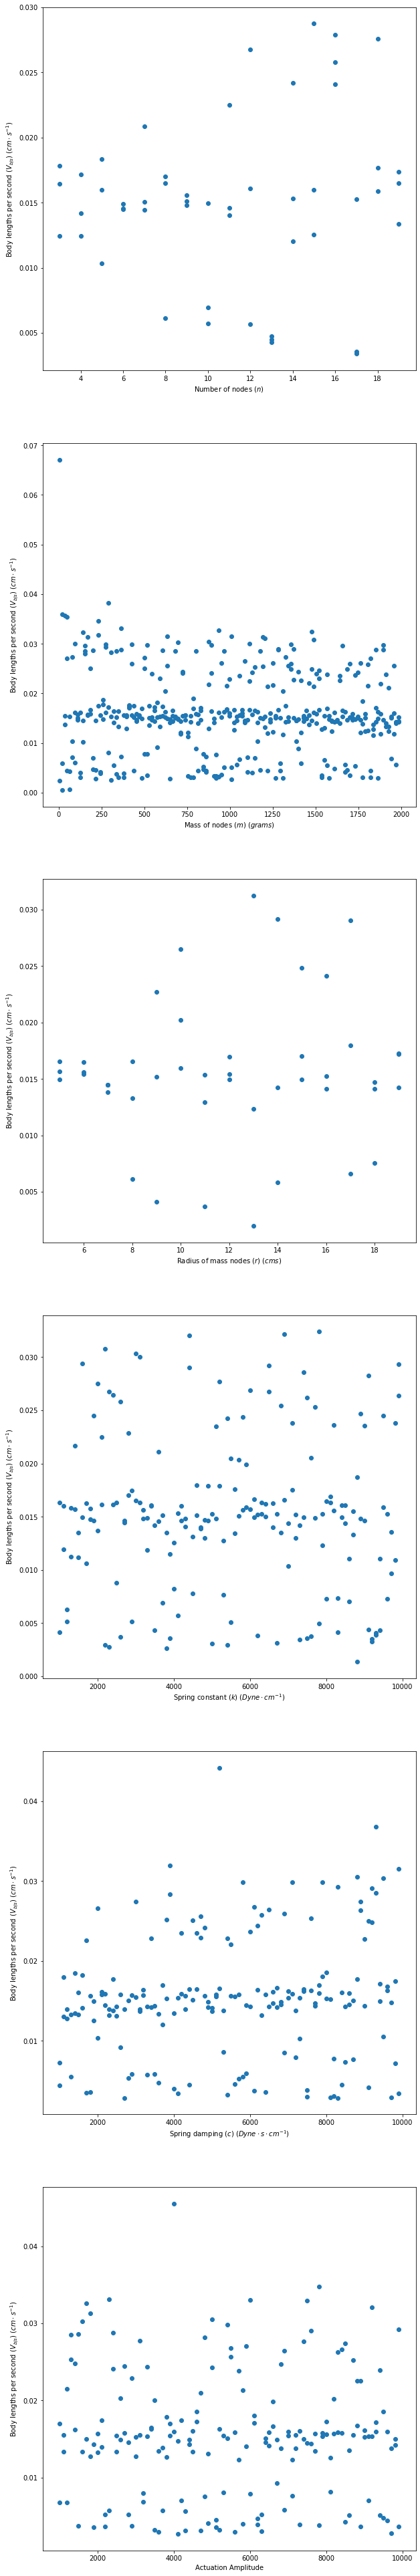

In [68]:
figure, axes = pyplot.subplots(6)
figure.set(figwidth=10, figheight=70)
axes[0].scatter(exp_1_data["n"], exp_1_data["blps"])
axes[0].set(xlabel="Number of nodes ($n$)", ylabel="Body lengths per second ($V_{b/s}$) ($cm\cdot s^{-1}$)")

axes[1].scatter(exp_2_data["m"], exp_2_data["blps"])
axes[1].set(xlabel="Mass of nodes ($m$) ($grams$)", ylabel="Body lengths per second ($V_{b/s}$) ($cm\cdot s^{-1}$)")

axes[2].scatter(exp_3_data["d_min"] / 3, exp_3_data["blps"])
axes[2].set(xlabel="Radius of mass nodes ($r$) ($cms$)", ylabel="Body lengths per second ($V_{b/s}$) ($cm\cdot s^{-1}$)")

axes[3].scatter(exp_8_data["k"], exp_8_data["blps"])
axes[3].set(xlabel="Spring constant ($k$) ($Dyne\cdot cm^{-1}$)", ylabel="Body lengths per second ($V_{b/s}$) ($cm\cdot s^{-1}$)")

axes[4].scatter(exp_9_data["damping"], exp_9_data["blps"])
axes[4].set(xlabel="Spring damping ($c$) ($Dyne\cdot s\cdot cm^{-1}$)", ylabel="Body lengths per second ($V_{b/s}$) ($cm\cdot s^{-1}$)")

axes[5].scatter([eval(a)[0] for a in exp_10_data["actuator_param_1"].tolist()], exp_10_data["blps"])
axes[5].set(xlabel="Actuation Amplitude", ylabel="Body lengths per second ($V_{b/s}$) ($cm\cdot s^{-1}$)")

In [69]:
exp_11_data = df[df['experiment']==12]
type_1 = exp_11_data[df['lattice_construct']==0]
type_2 = exp_11_data[df['lattice_construct']==1]
type_3 = exp_11_data[df['lattice_construct']==2]
type_4 = exp_11_data[df['lattice_construct']==3]

/tmp/ipykernel_6661/1611796495.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  type_1 = exp_11_data[df['lattice_construct']==0]
/tmp/ipykernel_6661/1611796495.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  type_2 = exp_11_data[df['lattice_construct']==1]
/tmp/ipykernel_6661/1611796495.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  type_3 = exp_11_data[df['lattice_construct']==2]
/tmp/ipykernel_6661/1611796495.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  type_4 = exp_11_data[df['lattice_construct']==3]


[Text(0.5, 0, 'Mass arrangement strategy ($strat$)'),
 Text(0, 0.5, 'Displacement ($cms$)')]

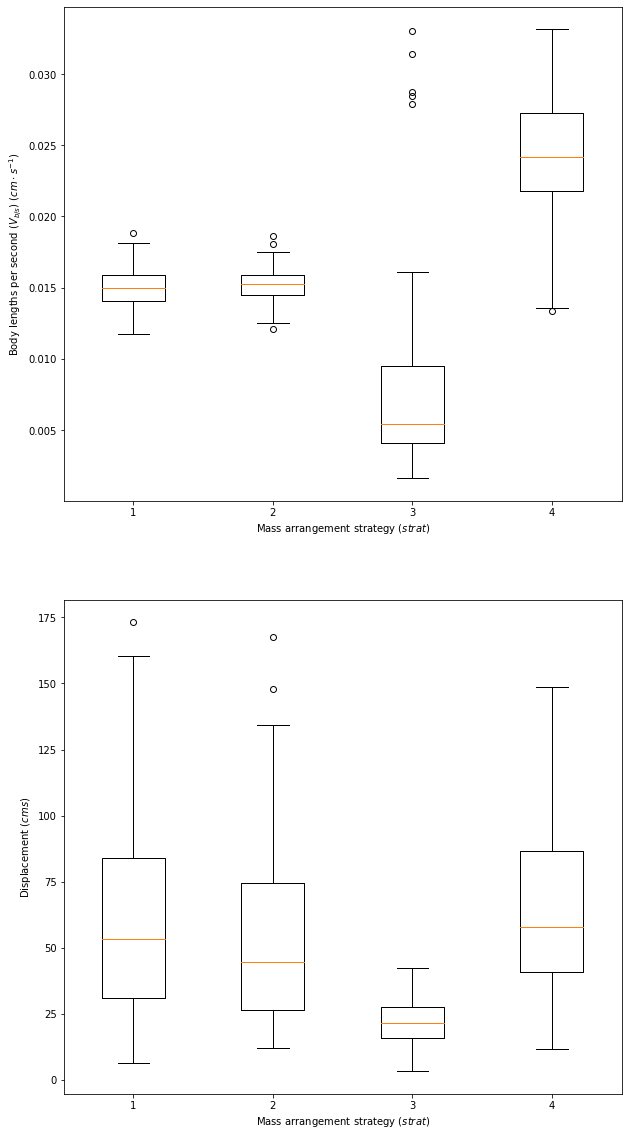

In [70]:
figure, axes = pyplot.subplots(2)
figure.set(figwidth=10, figheight=20)
axes[0].boxplot([type_1["blps"], type_2["blps"], type_3["blps"], type_4["blps"]])
axes[1].boxplot([type_1["displacement"], type_2["displacement"], type_3["displacement"], type_4["displacement"]])
axes[0].set(xlabel="Mass arrangement strategy ($strat$)", ylabel="Body lengths per second ($V_{b/s}$) ($cm\cdot s^{-1}$)")
axes[1].set(xlabel="Mass arrangement strategy ($strat$)", ylabel="Displacement ($cms$)")